# Análisis Exploratorio de Datos

## Introducción

Uno de los primeros pasos a la hora de realizar un proyecto que involucre el análisis de datos es explorar y visualizar los datos. El objetivo principal es obtener información sobre el contenido de los datos, ayudar a enmarcar las preguntas que haremos y detectar posibles vías para avanzar en las respuestas a estas preguntas.

Trabajaremos con un conjunto de datos clásico para Machine Learning, que consiste en datos de alojamiento para distritos en el estado de California, EE. UU. De hecho, usaremos una versión ligeramente modificada, preparada por Aurélien Géron.

**Plan**

La idea para hoy y para el jueves es dar los primeros pasos en la lista que hemos visto:

1. Obtención de los datos.

2. Exploración y visualización de los datos para obtener información.
     * ¿Qué tipo de preguntas podemos abordar con este conjunto de datos?

     * ¿Necesitamos datos adicionales?


3. Definición del proyecto.

4. Preprocesamiento. Preparación de los datos para los algoritmos de Machine Learning (El **jueves**).

5. Selección de modelo, entrenamiento, puesta a punto, ... (**Jueves**).

## Celdas preparatorias

Antes que nada, corramos algunas celdas de código para prepararnos. Mucho de lo que viene a continuación está sacado del libro de Aurélien Geron, y su [repo de GitHub](https://github.com/ageron/handson-ml2), que recomendamos.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "01_AED"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Obtención de los datos

El primer paso es hacerse con el conjunto de datos. Un archivo `csv` está disponible en el repositorio del curso, así que simplemente definimos la ruta desde la cual leeremos el archivo.

In [3]:
HOUSING_PATH = "datasets"

Sin embargo, si estás corriendo desde Colab, necesitamos descargar el archivo específicamente. Para evitar complicaciones al autenticarnos en nuestro repositorio, lo descargaremos de un repositorio público que hicimos para esto. (**Nota**: la siguiente celda no se ejecutará, a propósito, si no está usando Colab).

In [4]:
if 'google.colab' in sys.modules:
        
    import tarfile

#     DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/raw/master/"
#     HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
    DOWNLOAD_ROOT = "https://github.com/IAI-UNSAM/datasets/raw/master/"
    HOUSING_URL = DOWNLOAD_ROOT + "housing/housing.tgz"

    def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
        os.makedirs(housing_path, exist_ok=True)
        !wget {housing_url} -P {housing_path}
        tgz_path = os.path.join(housing_path, "housing.tgz")
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()

    # Corramos la función
    fetch_housing_data()

else: 
    print("No estás en Colab. Esta celda no hizo nada.")

No estás en Colab. Esta celda no hizo nada.


In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# The function loads the data as a Pandas DataFrame instance.
housing = load_housing_data()

## Exploración rápida de los datos

Ahora tenemos los datos en un formato muy práctico (y de uso común), una instancia de `pandas.DataFrame`.

Si no estás familiarizado con `Pandas`, veremos formas muy básicas de ver el contenido de una tabla. Acordate que siempre se puede agregar "?" A un objeto o método para acceder a su documentación (por ejemplo, `housing?` o `housing.head?`).

***

**1.** El método `.info` da información básica del contenido de cada columna.

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Vemos que hay **20640** entradas, con 10 columnas cada una. A excepción de `ocean_proximity`, todas las columnas son números (`float64`). Además, faltan algunas entradas en la columna `total_bedrooms`.

Cada una de estas filas corresponde a un distrito de California. En la analogía del ejemplo de las acciones, cada fila es un momento en el tiempo en el que se evalúa el precio de las acciones de *Tech1*.

***

**2.** Para ver las primeras líneas de la tabla, se usa el método `head`, que acepta un argumento optional para indicar cuántas líneas mostrar.

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Nota**: se puede acceder al nombre de las columnas con el atributo de `columns`.

In [8]:
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


Veamos un poco más de cerca `ocean_proximity`. ¿Qué valores toma? (**Nota**: se puede acceder a las columnas como atributos del `DataFrame` o con una sintaxis similar a la de un diccionario. En otras palabras, los dos comandos de la celda siguiente son equivalentes).

In [9]:
print(housing['ocean_proximity'].unique())
print(housing.ocean_proximity.unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


Podemos dar un paso más y ver cuántas veces aparece cada valor.

In [10]:
print(housing.ocean_proximity.value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [11]:
# Or a normalized version
print(housing.ocean_proximity.value_counts(normalize=True))

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64


***

**3.** Para las columnas numéricas, podemos obtener estadísticos descriptivos simples usando el método `.describe`.

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


 **Nota 1**: este método excluye automáticamente las entradas vacías o `NaN` para el cálculo. Vean la entrada `count` de la columna `total_bedrooms`.
 
 **Nota 2**: se puede ajustar qué percentiles se calculan usando el argumento `percentiles` del método `describe`.

***
**4.** Podemos ordenar la tabla para ver los distritos en los que alguna columna toma valores extremos.

In [13]:
housing.sort_values(by='median_income', ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4352,-118.37,34.10,37.0,407.0,67.0,100.0,47.0,15.0001,500001.0,<1H OCEAN
10673,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,500001.0,<1H OCEAN
8849,-118.40,34.08,52.0,3815.0,439.0,1266.0,413.0,15.0001,500001.0,<1H OCEAN
4606,-118.33,34.07,52.0,1482.0,171.0,531.0,161.0,15.0001,500001.0,<1H OCEAN
5257,-118.49,34.06,42.0,2861.0,360.0,829.0,310.0,15.0001,500001.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
3249,-119.99,36.09,23.0,333.0,92.0,198.0,55.0,0.4999,100000.0,INLAND
3258,-122.89,39.42,16.0,411.0,114.0,26.0,19.0,0.4999,73500.0,INLAND
6343,-117.75,34.06,52.0,62.0,9.0,44.0,16.0,0.4999,112500.0,INLAND
5213,-118.28,33.93,52.0,117.0,33.0,74.0,45.0,0.4999,90600.0,<1H OCEAN


Tal vez ya identificaron algunos comportamientos patológicos, pero nos guardamos un análisis más detallado para que se diviertan el jueves.

***

**5.** Podemos agrupar entradas en función del valor de una variable determinada. Esto es útil para un análisis rápido de los datos.

Por ejemplo, veamos cómo cambian los valores medios de las columnas con la variable `ocean_proximity`.

In [14]:
housing.groupby(by='ocean_proximity').mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


***

**6.** Por último, pero no por eso menos importante, podemos calcular estadísticos que involucran más de una variable. El más común es el coeficiente de correlación de Pearson.

Todavía no estamos para dar una definición formal, pero digamos que el coeficiente de Pearson de dos variables $X$ e $Y$, que llamamos $\hat{\rho_{XY}}$, es un _estimador_ del coeficiente de correlación poblacional:

$$
\hat{\rho_{XY}} = r = \frac{\hat{\mathrm{cov}}_{XY}}{\hat{\sigma}_X \hat{\sigma}_Y}\;\;,
$$
donde 

$$
\hat{\sigma}_X^2 = \frac{1}{N - 1}\sum_{i=1}^N (x_i - \bar{X})^2\;\;,
$$
$$
\hat{\mathrm{cov}}_{XY} = \frac{1}{N - 1}\sum_{i=1}^N (x_i - \bar{X})(y_i - \bar{Y})\;\;,
$$
y
$$
\hat{\mu_X} = \bar{X}\;\;.
$$

Los valores extremos son -1 y 1, para una (anti-)correlación lineal perfecta entre ambas variables.

Ah, entonces $r=0$ significa que las variables no están correlacionadas, ¿no? .... **¡No!**.

Pero no te preocupes por todos estos detalles si esto no te resulta familiar. Para obtener una idea más intuitiva, analicemos esta imagen, tomada de [Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient):

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg">

Los números sobre cada subimagen indican el valor del coeficiente de Pearson. **¿Qué te hace pensar esta figura?**

Calculemos ahora el coeficiente de Pearson para cada par de variables del conjunto de datos de California.

In [15]:
# The correlation between all pairs of variables is easily computed with Pandas.
corr_matrix = housing.corr()

In [16]:
# What size do you expect `corr_matrix` to be?
print(corr_matrix.shape)

(9, 9)


Podemos imprimir la matriz; pero más interesante, la podemos graficar.

In [17]:
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

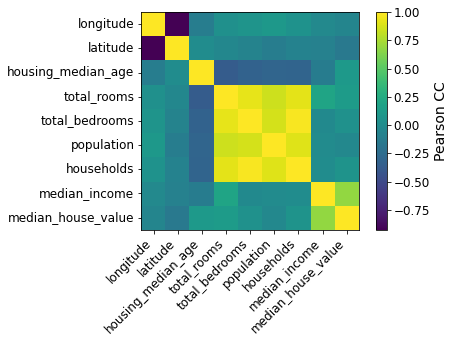

In [18]:
plt.imshow(corr_matrix)

# Set ticks
xt = plt.xticks(np.arange(9), housing.columns[:-1], rotation=45, ha='right', va='top')
yt = plt.yticks(np.arange(9), housing.columns[:-1], rotation=0, ha='right', va='center')

# Set colorbar
plt.colorbar(label='Pearson CC')

## Preguntas

***
Ahora que recorrimos un poco los datos, podemos deternenos un minuto a hacernos unas preguntas. 
No hay respuestas correctas o incorrectas

1) ¿Qué preguntas pueden responder estos datos?

2) ¿Cuáles serían los primeros pasos para encontrar respuestas a esas preguntas?

3) ¿Qué variables serían más relevantes en ese caso?

***
<font size=5>**¿Descanso?**</font>

## Visualización

¡Una excelente manera de obtener información a partir del conjunto de datos es hacer gráficos!

`Pandas` tiene un lindo *wrapper* a `matplotlib.pyplot`, but intentaremos usar exclusivamente las funciones de `pyplot` (que importamos arriba como `plt`).

Algunas funciones que podemos probar son:

* `plt.plot` o `plt.scatter` para graficar una variable en función de otra.
* `plt.hist` o `plt.bar` para ver cómo se distribuyen los valores de una variable.

Y para los que tengan más tendencia a la estadística:

* `plt.boxplot` para comparar las distribuciones de las variables.
* `plt.violinplot` para hacer lo mismo usando una estimación de *kernel* (que es un algoritmo considerado de machine learning).

Recuerdá que podés obtener la documentación de cada función agregando `?` al nombre. Por ejemplo:

In [19]:
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

Para ponerlo a prueba, hagamos un gráfico simple de latitud versus longitud.

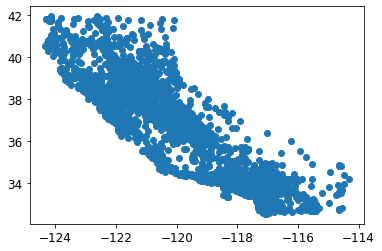

In [20]:
# Let's make  simple plot of latitude vs longitude
scatter = plt.scatter(housing.longitude, housing.latitude)
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')

Esta es un gráfico bastante feo. No nos dice mucho. Podemos distinguir la forma de California, pero eso es todo.

<img src="images/01_AED/Map_of_California.png" width=350/>

¡Seguro que podemos hacer algo mejor! Estoy seguro de que podés ayudar ...

***
# Práctica

<font size=7>¡Preparen sus teclados!</font>
<!-- ### Prepare your keyboards! -->


* Intentá hacer histogramas de varias variables (las que te parezcan más relevantes). ¿Notás algo que te llame la atención?
* Probá hacer algunos *scatter plots*.
* Se puede incluir más variables en un *scatter plot* usando los argumentos `color` (o `c`) y `size` (o `s`). También, podés intentar obtener gráficos más agradables y útiles haciendo que los puntos sean semi-transparentes con el argumento `alpha`.

**Nota**: podés salvar las figuras que quieras con la función `save_fig`, que definimos al principio del notebook.

Saving figure bad_visualization_plot


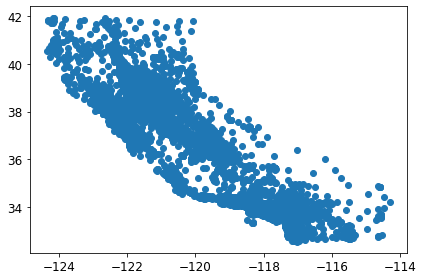

In [21]:
plt.scatter(housing.longitude, housing.latitude)
save_fig("bad_visualization_plot")